In [1]:
from euler import Euler
from laf import LinearAssignmentFlow

import numpy as np
from skimage import img_as_float
from skimage.io import imread
from skimage.transform import resize
import matplotlib.pyplot as plt

### Setup

In [2]:
img = resize(img_as_float(imread("../images/Scales1.png")), (70, 70))

# ground truth labels
labels = np.asarray(
    [[0.203, 0.656, 0.324],  # darkgreen
    [0.891, 0.043, 0.0],  # red
    [0.258, 0.188, 0.953],  # dark blue
    [0.98, 0.848, 0.02],  # yellow
    [0.082, 0.973, 0.375],  # lightgreen
    [0.258, 0.52, 0.953],  # light blue
    [0.902, 0.227, 0.867],  # violet
    [0.914, 0.484, 0.141]]  # brown
)

# LAF
laf = LinearAssignmentFlow(img, labels)
A, b = laf()
x0 = np.zeros(b.shape)

euler = Euler(A, b)

### Parameters

In [3]:
stepsizes = [0.0625, 0.125, 0.25, 0.5, 1]
distances = [1, 2, 4, 8, 16]

### Experiment

In [4]:
for stepsize in stepsizes:
    results = euler(x0, stepsize, distances)

times = [call['times'] for call in euler.calls]
times = np.asarray(times).T

100%|██████████| 16/16 [00:00<00:00, 952.11it/s]


### Visualization

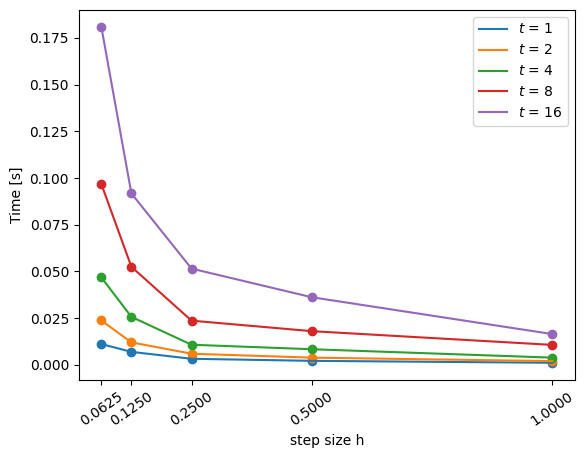

In [6]:
for i in range(len(distances)):
    plt.plot(stepsizes, times[i], label=fr"$t$ = {distances[i]}")
    plt.scatter(stepsizes, times[i])
plt.xticks(stepsizes, rotation=35)
plt.xlabel('step size h')
plt.ylabel('Time [s]')
plt.legend()
plt.show()